       Inviato   Ricevuto  PackSize Traffico      RTT
0    45.697805  45.709943         8     100K    12138
1    45.798006  45.809466        16     100K    11460
2    45.898167  45.909445        32     100K    11278
3    45.998334  46.140480        64     100K  1984286
4    46.985110  46.109014       128     100K    10503
..         ...        ...       ...      ...      ...
508  31.212635  31.212789       128      20M      154
509  41.212976  41.213077       256      20M      101
510  51.213378  51.213478       512      20M      100
511   1.213696   1.213846      1024      20M      150
512  11.214244  11.214638      1500      20M      394

[513 rows x 5 columns]


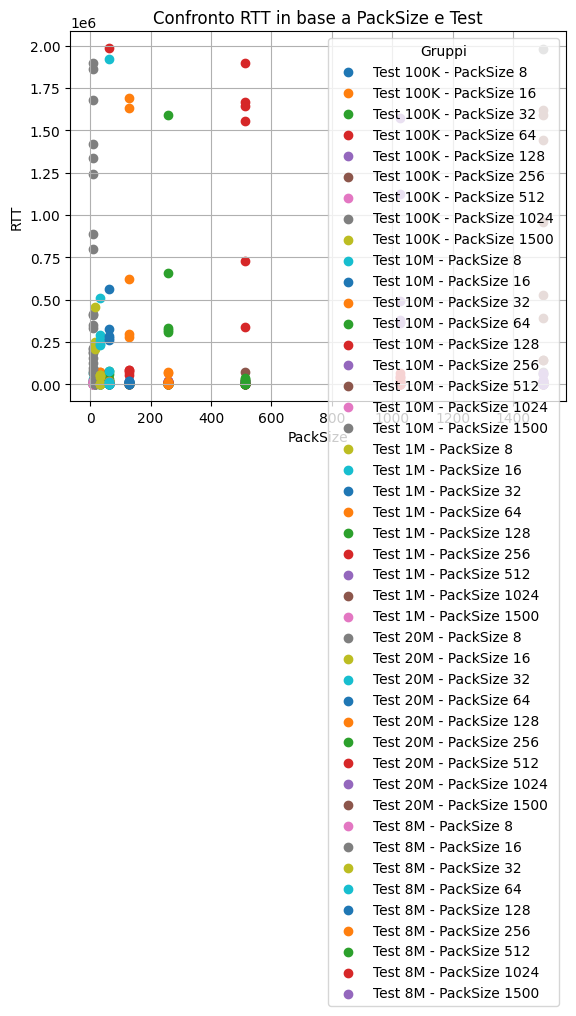

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-07-31.csv')

# Visualizzare il contenuto del DataFrame
print(df)

# Creare il grafico a dispersione
#plt.figure(figsize=(12, 8))

# Raggruppare i dati per 'Test' e 'PackSize'
groups = df.groupby(['Traffico', 'PackSize'])

# Disegnare i punti per ciascun gruppo
for (test, packsize), group in groups:
    plt.scatter(group['PackSize'], group['RTT'], label=f'Test {test} - PackSize {packsize}')

# Etichette degli assi
plt.xlabel('PackSize')
plt.ylabel('RTT')
plt.title('Confronto RTT in base a PackSize e Test')
plt.legend(title='Gruppi')
plt.grid(True)
plt.show()


       Inviato   Ricevuto  PackSize Traffico      RTT
0    45.697805  45.709943         8     100K    12138
1    45.798006  45.809466        16     100K    11460
2    45.898167  45.909445        32     100K    11278
3    45.998334  46.140480        64     100K  1984286
4    46.985110  46.109014       128     100K    10503
..         ...        ...       ...      ...      ...
508  31.212635  31.212789       128      20M      154
509  41.212976  41.213077       256      20M      101
510  51.213378  51.213478       512      20M      100
511   1.213696   1.213846      1024      20M      150
512  11.214244  11.214638      1500      20M      394

[513 rows x 5 columns]
                            mean            std  count
Traffico PackSize                                     
100K     8           3653.888889    7345.274083      9
         16          3496.444444    7100.568342      9
         32          3550.222222    7271.858631      9
         64        222636.888889  660648.179210      

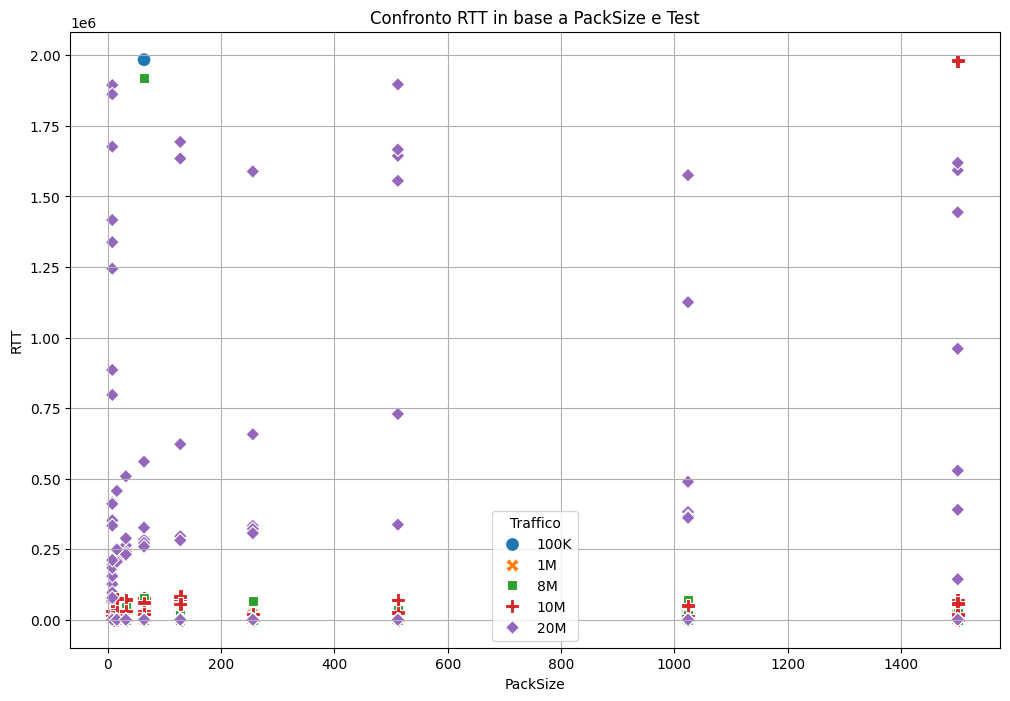

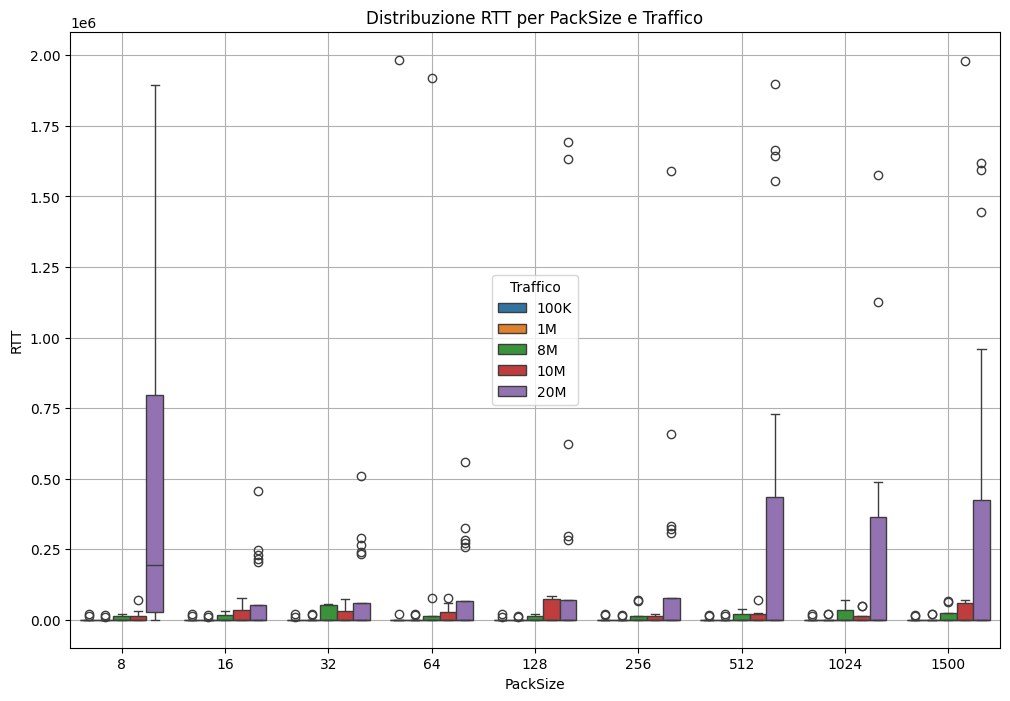

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-07-24.csv')

# Visualizzare il contenuto del DataFrame
print(df)

# Calcolare statistiche descrittive
stats = df.groupby(['Traffico', 'PackSize'])['RTT'].agg(['mean', 'std', 'count'])
print(stats)

# Creare grafico a dispersione
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PackSize', y='RTT', hue='Traffico', style='Traffico', s=100)
plt.xlabel('PackSize')
plt.ylabel('RTT')
plt.title('Confronto RTT in base a PackSize e Test')
plt.legend(title='Traffico')
plt.grid(True)
plt.show()

# Creare box plot per la distribuzione del RTT
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='PackSize', y='RTT', hue='Traffico')
plt.xlabel('PackSize')
plt.ylabel('RTT')
plt.title('Distribuzione RTT per PackSize e Traffico')
plt.legend(title='Traffico')
plt.grid(True)
plt.show()


  Traffico      mean           var       std  min      max  count
0     100K    3674.0  4.851827e+07    6966.0   41    20230     81
1      10M   20529.0  1.041574e+09   32273.0   38   180677     81
2       1M    3645.0  4.742420e+07    6887.0   43    20532     81
3      20M  183390.0  1.325834e+11  364120.0   44  1896739    189
4       8M   17787.0  1.609988e+09   40125.0   38   320853     81


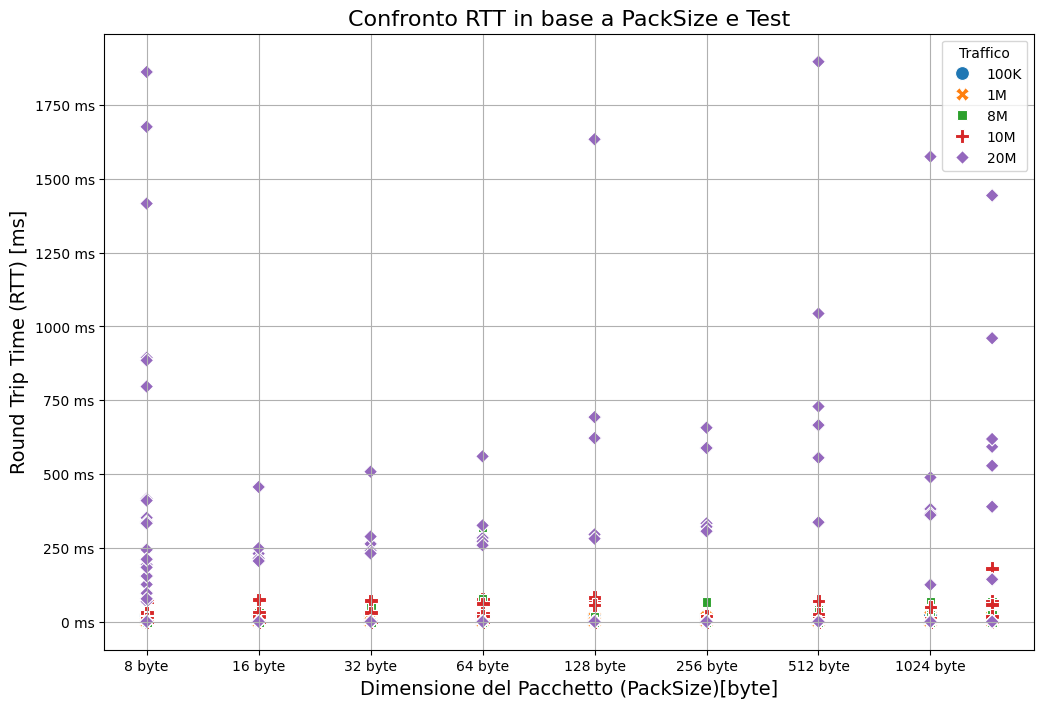

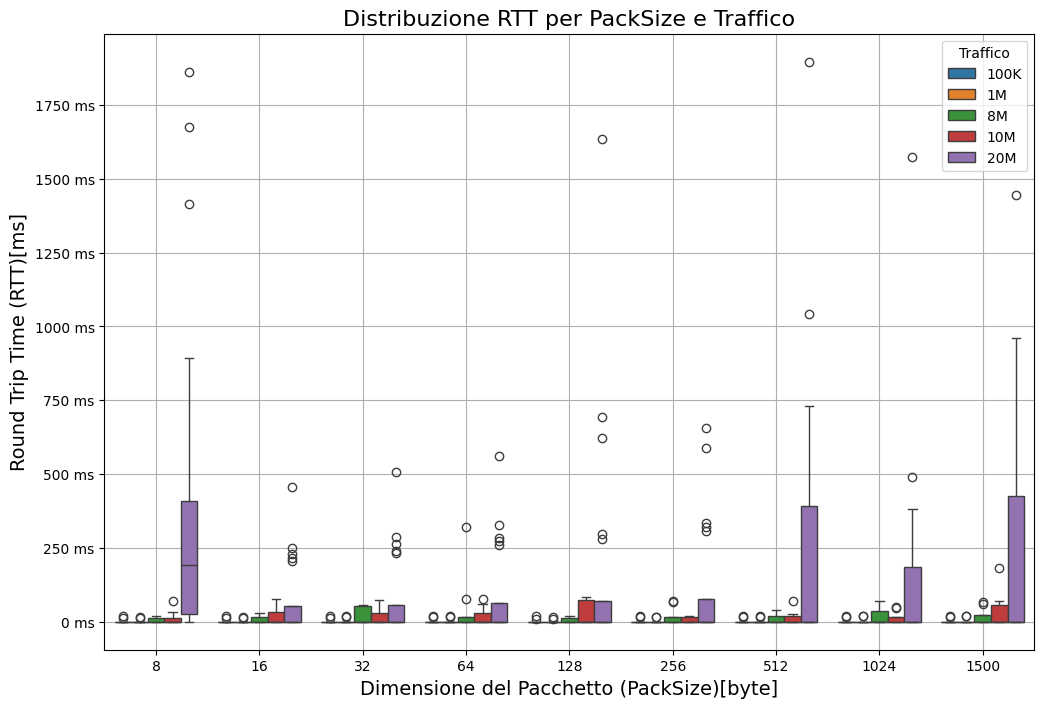

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-07-24.csv')

# Calcolare la media e la varianza del RTT per tipologia di test
stats = df.groupby('Traffico')['RTT'].agg(['mean', 'var','std','min','max','count']).reset_index()
stats_formatted=stats.round(0)
# Visualizzare le statistiche calcolate
print(stats_formatted)

# Funzione per formattare i tick sull'asse y
def y_fmt(x, pos):
    return f'{x*0.001:.0f} ms'
# Funzione per formattare i tick sull'asse x
def x_fmt(x, pos):
    return f'{int(x)} byte'
pack_sizes = sorted(df['PackSize'].unique())
# Creare il grafico a dispersione
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PackSize', y='RTT', hue='Traffico', style='Traffico', s=100)

# Personalizzare gli assi
plt.xlabel('Dimensione del Pacchetto (PackSize)[byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT) [ms]', fontsize=14)
plt.title('Confronto RTT in base a PackSize e Test', fontsize=16)
# Impostare i tick dell'asse x usando i valori univoci di PackSize
plt.xticks(pack_sizes)
plt.xscale('log',base=2)
# Impostare i formattatori degli assi
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_fmt))
# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()

# Creare il box plot per la distribuzione del RTT
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='PackSize', y='RTT', hue='Traffico')
plt.xlabel('Dimensione del Pacchetto (PackSize)[byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.title('Distribuzione RTT per PackSize e Traffico', fontsize=16)

# Impostare i formattatori degli assi
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()


  Traffico     mean           var      std  min     max  count
0     100K   3674.0  4.851827e+07   6966.0   41   20230     81
1      10M  20529.0  1.041574e+09  32273.0   38  180677     81
2       1M   3645.0  4.742420e+07   6887.0   43   20532     81
3       8M  17787.0  1.609988e+09  40125.0   38  320853     81


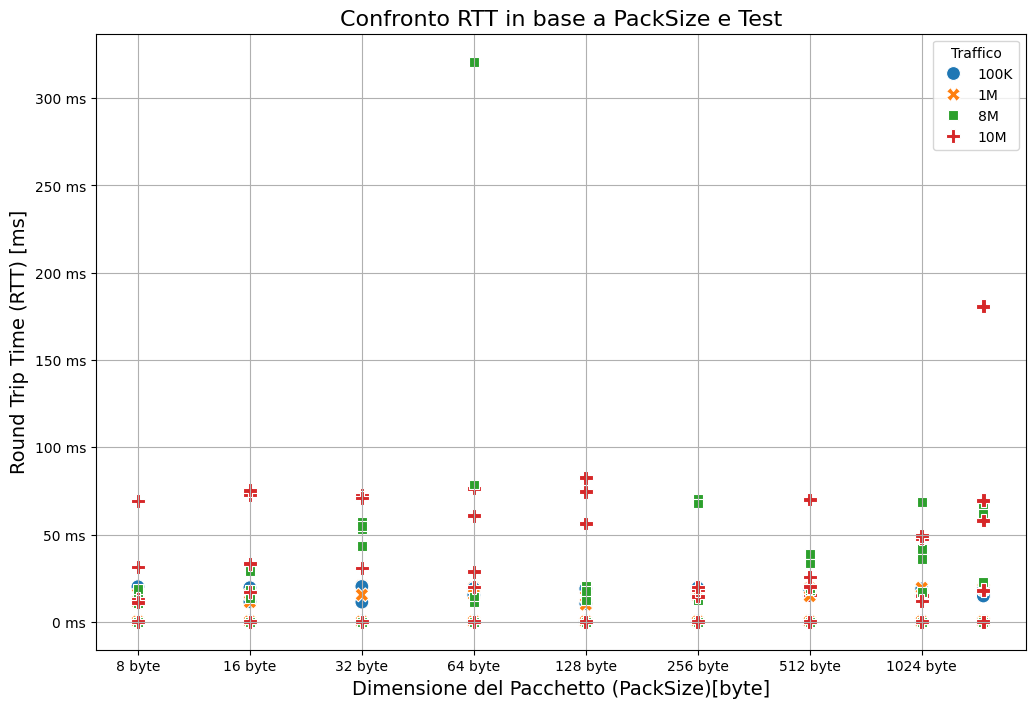

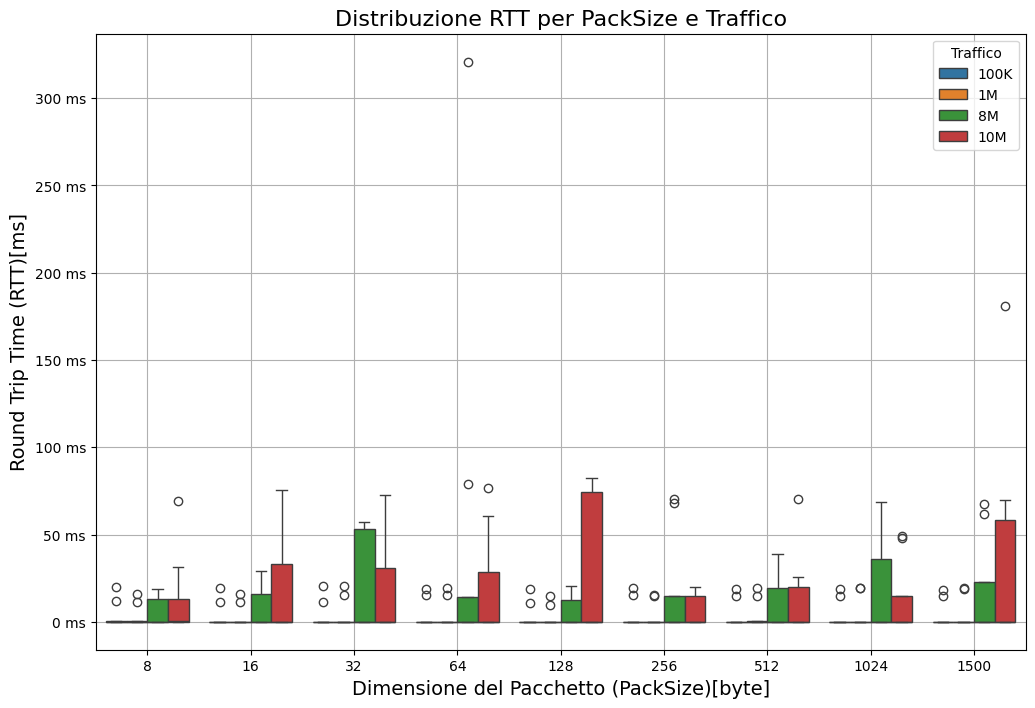

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-07-24.csv')
df_filt=df[df['Traffico'] != '20M']
# Calcolare la media e la varianza del RTT per tipologia di test
stats = df_filt.groupby('Traffico')['RTT'].agg(['mean', 'var','std','min','max','count']).reset_index()
stats_formatted=stats.round(0)
# Visualizzare le statistiche calcolate
print(stats_formatted)

# Funzione per formattare i tick sull'asse y
def y_fmt(x, pos):
    return f'{x*0.001:.0f} ms'
# Funzione per formattare i tick sull'asse x
def x_fmt(x, pos):
    return f'{int(x)} byte'
pack_sizes = sorted(df_filt['PackSize'].unique())
# Creare il grafico a dispersione
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filt, x='PackSize', y='RTT', hue='Traffico', style='Traffico', s=100)

# Personalizzare gli assi
plt.xlabel('Dimensione del Pacchetto (PackSize)[byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT) [ms]', fontsize=14)
plt.title('Confronto RTT in base a PackSize e Test', fontsize=16)
# Impostare i tick dell'asse x usando i valori univoci di PackSize
plt.xticks(pack_sizes)
plt.xscale('log',base=2)
# Impostare i formattatori degli assi
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_fmt))
# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()

# Creare il box plot per la distribuzione del RTT
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filt, x='PackSize', y='RTT', hue='Traffico')
plt.xlabel('Dimensione del Pacchetto (PackSize)[byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.title('Distribuzione RTT per PackSize e Traffico', fontsize=16)

# Impostare i formattatori degli assi
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()


  Traffico    mean          var      std   min       max  count
0       0M  5592.0  667397933.0  25834.0  53.0  175610.0     81
1      10M  4129.0  362792542.0  19047.0  61.0  166490.0     81
2      15M  5326.0  577409205.0  24029.0  48.0  175527.0     81
3       1M  2621.0   32197687.0   5674.0  53.0   17589.0     55
4      20M  2093.0   35706869.0   5976.0  49.0   29750.0     81
5       8M  2449.0   34178495.0   5846.0  47.0   21877.0     81


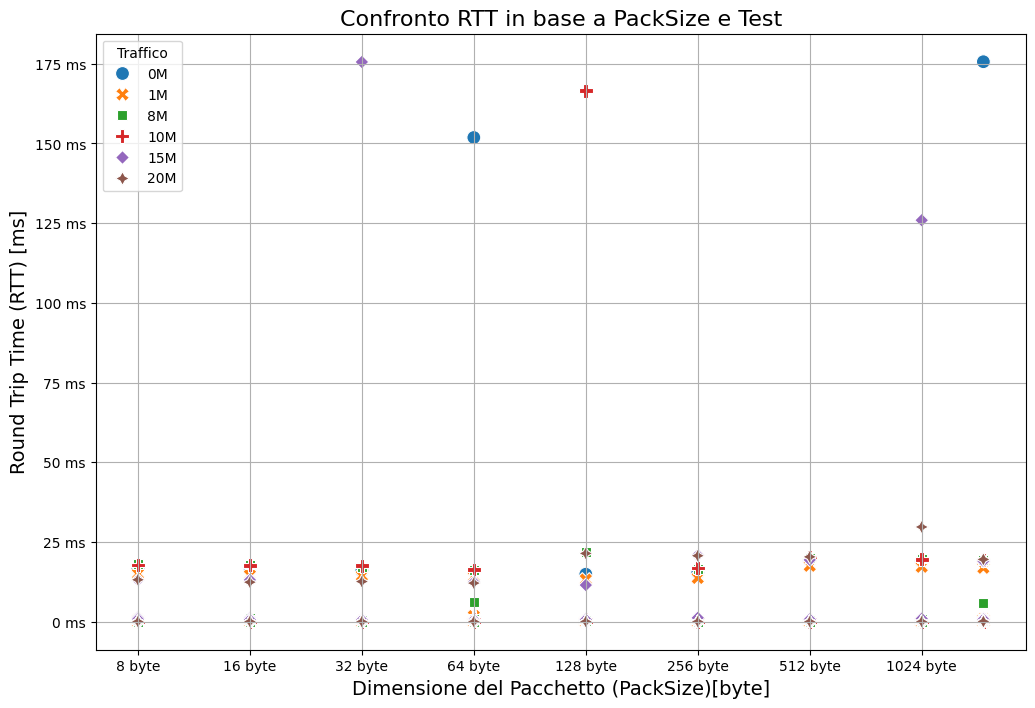

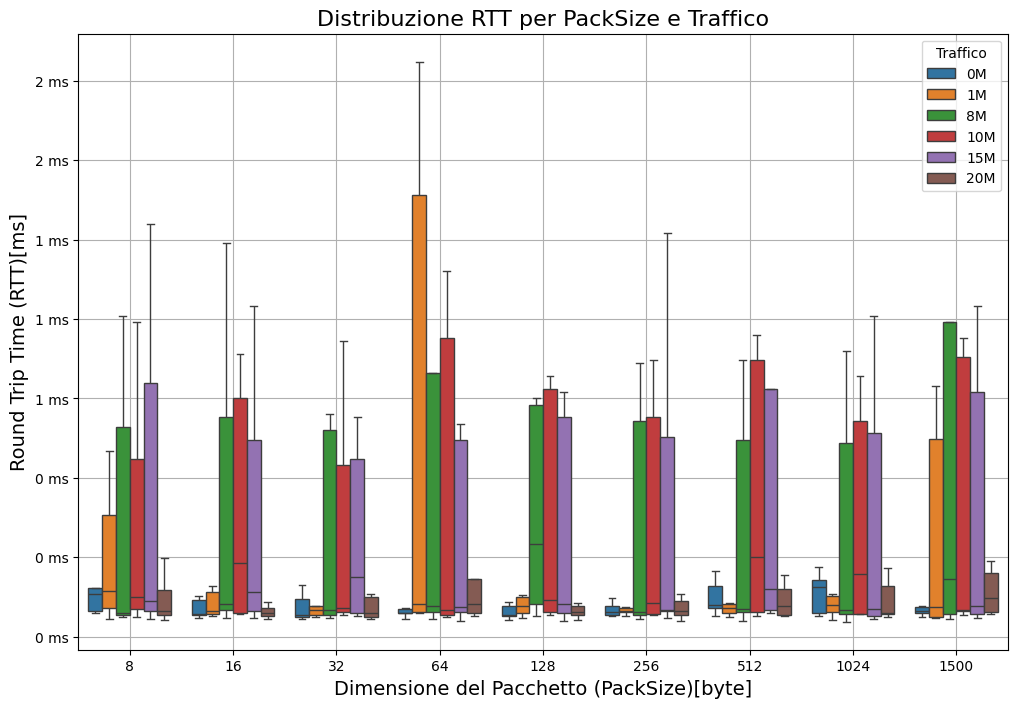

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-07-31_1.csv')

# Ricalcolare l'RTT come differenza tra Ricevuto e Inviato
df['RTT'] = (df['Ricevuto'] - df['Inviato'])*1e6

# Filtrare i dati per rimuovere i valori negativi di RTT
df = df[df['RTT'] >= 0]

# Calcolare la media e la varianza del RTT per tipologia di test
stats = df.groupby('Traffico')['RTT'].agg(['mean', 'var','std','min','max','count']).reset_index()
stats_formatted=stats.round(0)
# Visualizzare le statistiche calcolate
print(stats_formatted)

# Funzione per formattare i tick sull'asse y
def y_fmt(x, pos):
    return f'{x*0.001:.0f} ms'
# Funzione per formattare i tick sull'asse x
def x_fmt(x, pos):
    return f'{int(x)} byte'
pack_sizes = sorted(df['PackSize'].unique())
# Creare il grafico a dispersione
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PackSize', y='RTT', hue='Traffico', style='Traffico', s=100)

# Personalizzare gli assi
plt.xlabel('Dimensione del Pacchetto (PackSize)[byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT) [ms]', fontsize=14)
plt.title('Confronto RTT in base a PackSize e Test', fontsize=16)
# Impostare i tick dell'asse x usando i valori univoci di PackSize
plt.xticks(pack_sizes)
plt.xscale('log',base=2)
# Impostare i formattatori degli assi
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_fmt))
# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()

# Creare il box plot per la distribuzione del RTT
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='PackSize', y='RTT', hue='Traffico',showfliers=False)
plt.xlabel('Dimensione del Pacchetto (PackSize)[byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.title('Distribuzione RTT per PackSize e Traffico', fontsize=16)

# Impostare i formattatori degli assi
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()


  Traffico    mean          var      std   min       max  count
0       0M  5592.0  667397933.0  25834.0  53.0  175610.0     81
1      10M  4129.0  362792542.0  19047.0  61.0  166490.0     81
2      15M  5326.0  577409205.0  24029.0  48.0  175527.0     81
3       1M  2621.0   32197687.0   5674.0  53.0   17589.0     55
4       8M  2449.0   34178495.0   5846.0  47.0   21877.0     81


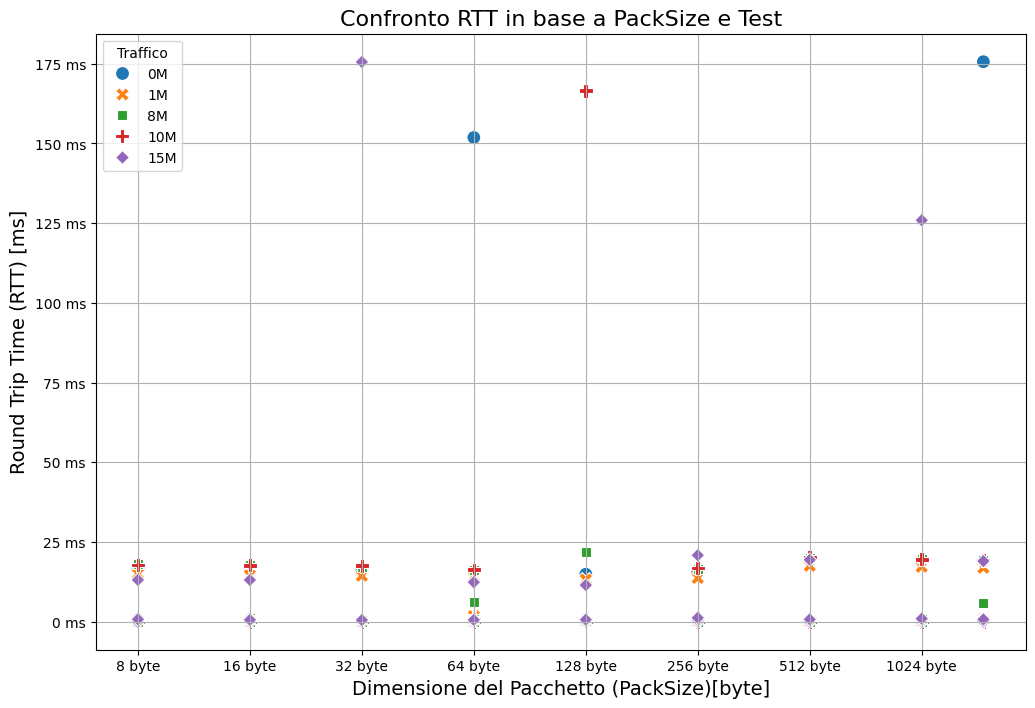

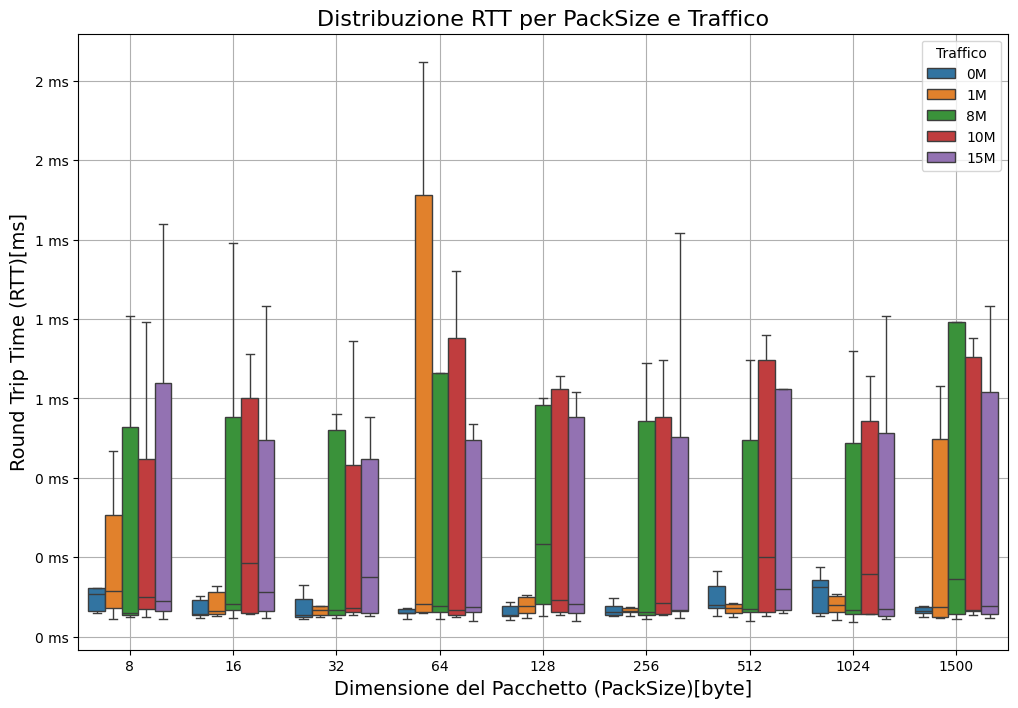

In [2]:
df = df[df['Traffico'] != '20M']
stats = df.groupby('Traffico')['RTT'].agg(['mean', 'var','std','min','max','count']).reset_index()
stats_formatted=stats.round(0)
# Visualizzare le statistiche calcolate
print(stats_formatted)

# Funzione per formattare i tick sull'asse y
def y_fmt(x, pos):
    return f'{x*0.001:.0f} ms'
# Funzione per formattare i tick sull'asse x
def x_fmt(x, pos):
    return f'{int(x)} byte'
pack_sizes = sorted(df['PackSize'].unique())
# Creare il grafico a dispersione
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PackSize', y='RTT', hue='Traffico', style='Traffico', s=100)

# Personalizzare gli assi
plt.xlabel('Dimensione del Pacchetto (PackSize)[byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT) [ms]', fontsize=14)
plt.title('Confronto RTT in base a PackSize e Test', fontsize=16)
# Impostare i tick dell'asse x usando i valori univoci di PackSize
plt.xticks(pack_sizes)
plt.xscale('log',base=2)
# Impostare i formattatori degli assi
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.gca().xaxis.set_major_formatter(FuncFormatter(x_fmt))
# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()

# Creare il box plot per la distribuzione del RTT
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='PackSize', y='RTT', hue='Traffico',showfliers=False)
plt.xlabel('Dimensione del Pacchetto (PackSize)[byte]', fontsize=14)
plt.ylabel('Round Trip Time (RTT)[ms]', fontsize=14)
plt.title('Distribuzione RTT per PackSize e Traffico', fontsize=16)

# Impostare i formattatori degli assi
plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

# Abilitare la griglia
plt.grid(True)

# Mostrare il grafico
plt.show()
